# 모듈 불러오기

In [1]:
# import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# 그래프 한글 깨짐
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

#warning 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore")

# 데이터 불러오기

In [3]:
df = pd.read_csv("./mail.csv")
df.head(5)

,보낸이,메일주소,제목,내용,스팸여부
0,네이버 시리즈,series_noreply@webtoonscorp.com,[네이버 시리즈] '히든 특성 13개 ...'의 구매 내역을 안내해 드립니다.,NaN,1
1,""" 현금이벤트 """,nbadmin2@imga1.com,(광고) 않바꾸면 손해! 인터넷 변경하고 현금 47만원 받아가세요~,"<table width=""100%"" border=""0"" cellspacing=""0""...",0
2,네이버 시리즈,series_noreply@webtoonscorp.com,[네이버 시리즈] '아카데미 편의점으로...'의 구매 내역을 안내해 드립니다.,NaN,1
3,네이버 시리즈,series_noreply@webtoonscorp.com,[네이버 시리즈] '나 혼자 탑에서 농...'의 구매 내역을 안내해 드립니다.,NaN,1
4,네이버 시리즈,series_noreply@webtoonscorp.com,[네이버 시리즈] '멸망 예정인 아카데...'의 구매 내역을 안내해 드립니다.,NaN,1


# 전처리

In [4]:
df = df.dropna(subset=["제목"])
# null값이 있으면 제대로 된 예측이 안나오니 null값을 제거

## 필요한 컬럼 선정

In [5]:
# 제목과 스팸여부만을 이용해 예측
notnull_df = df.loc[:,["스팸여부","제목"]]

In [6]:
notnull_df

,스팸여부,제목
0,1,[네이버 시리즈] '히든 특성 13개 ...'의 구매 내역을 안내해 드립니다.
1,0,(광고) 않바꾸면 손해! 인터넷 변경하고 현금 47만원 받아가세요~
2,1,[네이버 시리즈] '아카데미 편의점으로...'의 구매 내역을 안내해 드립니다.
3,1,[네이버 시리즈] '나 혼자 탑에서 농...'의 구매 내역을 안내해 드립니다.
4,1,[네이버 시리즈] '멸망 예정인 아카데...'의 구매 내역을 안내해 드립니다.
...,...,...
178,0,한국 Twitch에 대한 주요 공지사항
179,1,YouTube Premium 가격 업데이트
180,0,"안녕, 마테오 👋"
181,1,보안 알림


In [7]:
notnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   스팸여부    182 non-null    int64 
 1   제목      182 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [8]:
notnull_df.shape

(182, 2)

In [9]:
print('제목의 유니크한 값 :',notnull_df['제목'].nunique())
# 182개중 유니크한 값이 133개라는 것은 49개의 중복값이 존재한다는 의미

제목의 유니크한 값 : 133


In [10]:
# 중복 값들을 제거
notnull_df.drop_duplicates(subset=['제목'], inplace=True)
print('총 샘플의 수 :',len(notnull_df))

총 샘플의 수 : 133


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


정상 메일과 스팸 메일의 개수
   스팸여부  count
0     0     90
1     1     43


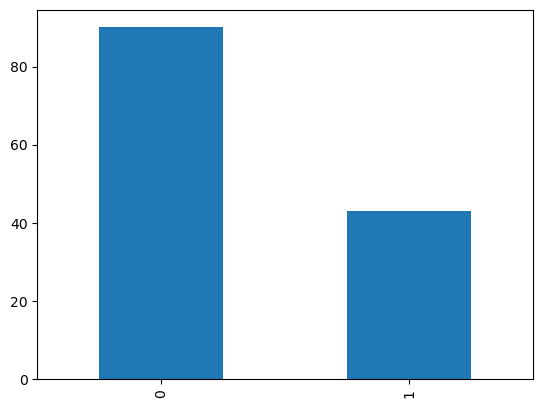

In [11]:
notnull_df['스팸여부'].value_counts().plot(kind='bar')
print('정상 메일과 스팸 메일의 개수')
print(notnull_df.groupby('스팸여부').size().reset_index(name='count'))
# 스팸 90건, 일반 메일 43건
# 데이터의 갯수도 적지만, 대부분이 스팸 메일이다.

In [12]:
print(f'스팸 메일의 비율 = {round(notnull_df["스팸여부"].value_counts()[0]/len(notnull_df) * 100,2)}%')
print(f'정상 메일의 비율 = {round(notnull_df["스팸여부"].value_counts()[1]/len(notnull_df) * 100,2)}%')

스팸 메일의 비율 = 67.67%
정상 메일의 비율 = 32.33%


In [13]:
X_data = notnull_df['제목']
y_data = notnull_df['스팸여부']
# 학습대상과 정답을 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
# stratify : train,test에 스팸이 과다하게 들어가서 일반 메일이 없거나, 모든 일반 메일이 들어가는 경우를 없게한다.

In [15]:
# 토큰화와 정수 인코딩 과정을 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[27, 98, 99, 100, 12, 101, 28], [1, 29, 30, 14, 9], [102, 103, 104, 105, 106, 107], [1, 18, 19, 108, 109, 110, 31, 20], [1, 111, 112, 113, 32, 114, 115]]


In [16]:
# 어떤 단어에 어떤 정수가 매칭 되었는지 롹인
word_to_index = tokenizer.word_index
print(word_to_index)

{'광고': 1, '드립니다': 2, '네이버': 3, '구매': 4, '내역을': 5, '안내해': 6, '안내': 7, "'의": 8, '할인': 9, '시리즈': 10, '웹툰': 11, '및': 12, '11': 13, '45': 14, '2024': 15, "sara's": 16, 'pick': 17, 'dacon': 18, '데이스쿨': 19, '오픈': 20, '알림': 21, '모집': 22, '위한': 23, '최초': 24, '시작': 25, '개인정보': 26, '주': 27, '개정': 28, '사이버': 29, '먼데이': 30, '예측': 31, '온라인': 32, '비밀번호': 33, '데이콘': 34, 'ai': 35, '경진대회': 36, 'ipv4': 37, '대한': 38, '새로운': 39, 'for': 40, '1': 41, '내역': 42, '광군제': 43, '50': 44, 'on': 45, '되었습니다': 46, '와디즈': 47, '10만원대': 48, '소가죽': 49, '수제화': 50, '초경량': 51, '키높이': 52, '5': 53, '5cm': 54, '직장인': 55, '더비슈즈': 56, '프로젝트': 57, '새소식': 58, '❗': 59, '수': 60, '참가': 61, '접수완료': 62, '광고성': 63, '백승수님의': 64, '갤럭시z': 65, 'flip5': 66, '확인하세요': 67, '업데이트': 68, '회원가입': 69, '환영합니다': 70, '남성': 71, '패션': 72, '혜택': 73, '💌': 74, "'아카데미": 75, 'fine': 76, 'tuning': 77, 'job': 78, 'ftjob': 79, 'successfully': 80, 'completed': 81, '🔴': 82, '방금': 83, '공개': 84, 'music': 85, '이용내역': 86, '25': 87, '마감': 88, '임박': 89, '신청하세요': 90, '등': 

In [17]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 473
단어 집합(vocabulary)에서 희귀 단어의 비율: 82.98245614035088
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 59.27318295739349


In [18]:
# 등장빈도가 1회인 희귀단어의 등장 확률이 82%나 됩니다.
# 여기서는 그렇지 않지만, 희귀단어의 등장확률이 너무 낮다면 threshold의 수를 변경하여 조절가능합니다.

In [19]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 571


메일의 최대 길이 : 28
메일의 평균 길이 : 7.528302


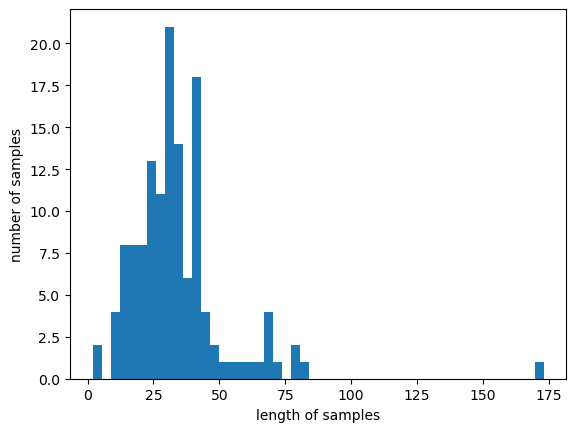

In [20]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
max_len = 28
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (106, 28)


# RNN으로 스팸 메일 분류하기

In [22]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [23]:
embedding_dim = 32
hidden_units = 32

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
2/2 [==============================] - 1s 259ms/step - loss: 0.7186 - acc: 0.4167 - val_loss: 0.6203 - val_acc: 0.7727
Epoch 2/4
2/2 [==============================] - 0s 52ms/step - loss: 0.6101 - acc: 0.6667 - val_loss: 0.6191 - val_acc: 0.8182
Epoch 3/4
2/2 [==============================] - 0s 36ms/step - loss: 0.5622 - acc: 0.7381 - val_loss: 0.5895 - val_acc: 0.8182
Epoch 4/4
2/2 [==============================] - 0s 34ms/step - loss: 0.5121 - acc: 0.7619 - val_loss: 0.6036 - val_acc: 0.8182


In [25]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))
# 정확도가 77%로 쓸만한 것 같지만, 애초에 데이터가 적어서 참고정도만 가능하다고 판단됨

1/1 [==============================] - 0s 28ms/step - loss: 0.6155 - acc: 0.7778

 테스트 정확도: 0.7778


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


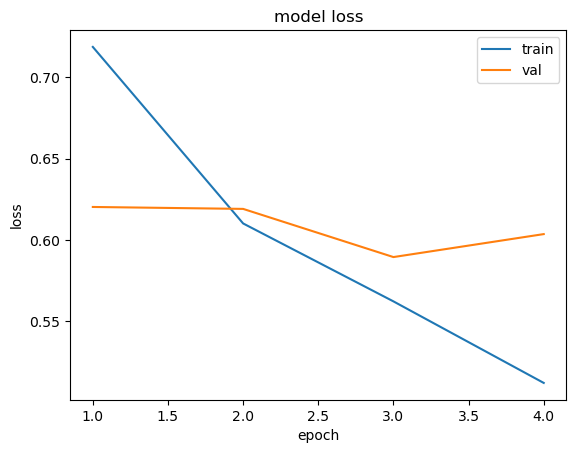

In [26]:
# 학습과 검정의 정확도 비교 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [27]:
# 학습의 경우 loss가 가파르게 떨어지지만, 검증의 경우 그렇게 많이 떨어지진 않는다.

In [28]:
-------번외-------

SyntaxError: invalid syntax (2834429341.py, line 1)

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 1s 208ms/step - loss: 0.6918 - acc: 0.5476 - val_loss: 0.5655 - val_acc: 0.7727
Epoch 2/10
2/2 [==============================] - 0s 43ms/step - loss: 0.6107 - acc: 0.6667 - val_loss: 0.5543 - val_acc: 0.7727
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 0.5710 - acc: 0.6667 - val_loss: 0.5820 - val_acc: 0.8182
Epoch 4/10
2/2 [==============================] - 0s 61ms/step - loss: 0.5261 - acc: 0.7381 - val_loss: 0.5822 - val_acc: 0.8182
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 0.4830 - acc: 0.7857 - val_loss: 0.6347 - val_acc: 0.7273
Epoch 6/10
2/2 [==============================] - 0s 37ms/step - loss: 0.4407 - acc: 0.9405 - val_loss: 0.5654 - val_acc: 0.8182
Epoch 7/10
2/2 [==============================] - 0s 37ms/step - loss: 0.3866 - acc: 0.8810 - val_loss: 0.5881 - val_acc: 0.7273
Epoch 8/10
2/2 [==============================] - 0s 39ms/step - loss: 0.3435 - acc: 0.9286 - va

In [30]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

1/1 [==============================] - 0s 24ms/step - loss: 0.5789 - acc: 0.7778

 테스트 정확도: 0.7778


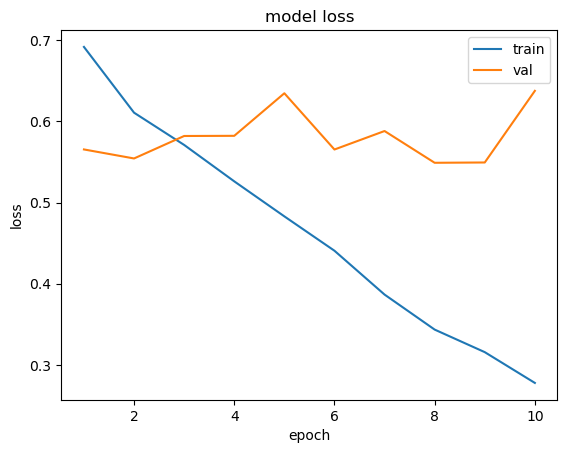

In [31]:
# 학습과 검정의 정확도 비교 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
# 에포크가 4가 넘어가면 검증의 경우 오히려 loss가 증가하는 경향을 보인다.